## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights


**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

We read the dataset in this step:

In [4]:
amazon_data = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [5]:
amazon_data.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [9]:
frequency_table = amazon_data['category'].value_counts()
frequency_table.head(5)

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


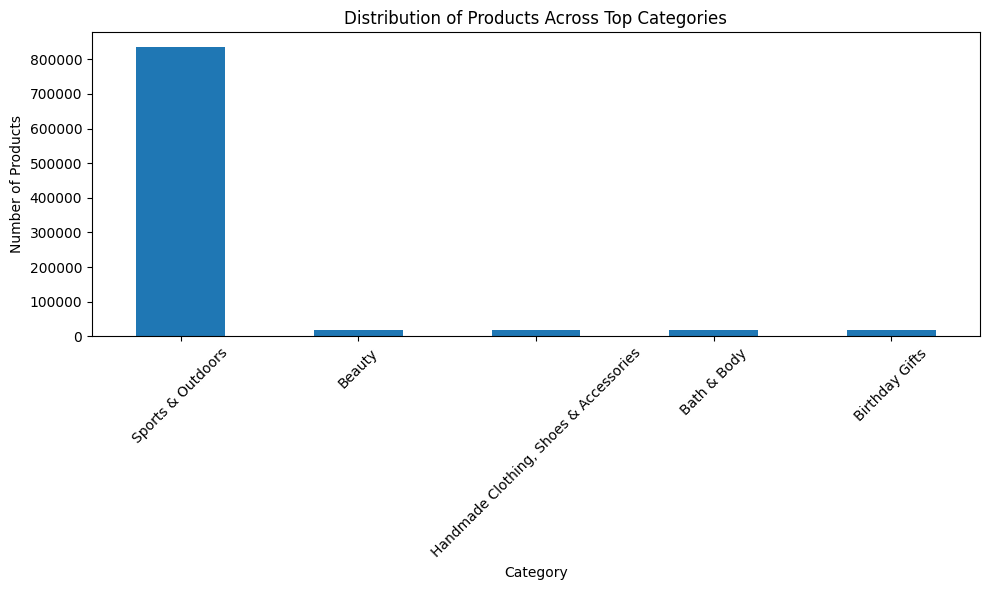

In [11]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
frequency_table.head(5).plot(kind='bar')
plt.title('Distribution of Products Across Top Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated category names

# Show the plot
plt.show()

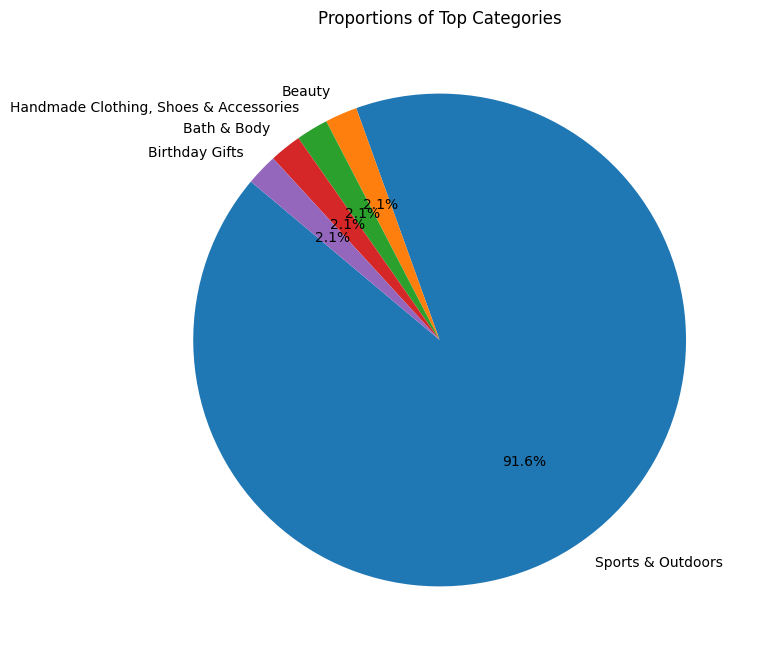

In [12]:
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(frequency_table.head(5), labels=frequency_table.head(5).index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Top Categories')

# Show the plot
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?


In [14]:
mean_price_per_category = amazon_data['price'].mean()
median_price_per_category = amazon_data['price'].median()
mode_price_per_category = amazon_data['price'].mode()

print('Mean price per category:', mean_price_per_category)
print('Median price per category:', median_price_per_category)
print('Mode price per category:', mode_price_per_category)

Mean price per category: 89.24380943923663
Median price per category: 19.09
Mode price per category: 0    9.99
Name: price, dtype: float64


In [15]:
if mean_price_per_category > mode_price_per_category[0]:
    print("The average price point is higher than the most common price point.")
elif mean_price_per_category < mode_price_per_category[0]:
    print("The average price point is lower than the most common price point.")
else:
    print("The average price point and the most common price point are the same.")

The average price point is higher than the most common price point.


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [16]:
variance_price_per_category = amazon_data['price'].var()
std_dev_price_per_category = amazon_data['price'].std()
range_price_per_category = amazon_data['price'].max() - amazon_data['price'].min()
interquartile_range_price_per_category = amazon_data['price'].quantile(0.75) - amazon_data['price'].quantile(0.25)

print('Variance of price per category:', variance_price_per_category)
print('Standard deviation of price per category:', std_dev_price_per_category)
print('Range of price per category:', range_price_per_category)
print('Interquartile range of price per category:', interquartile_range_price_per_category)

Variance of price per category: 119445.48532254907
Standard deviation of price per category: 345.60886175349884
Range of price per category: 100000.0
Interquartile range of price per category: 36.0


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

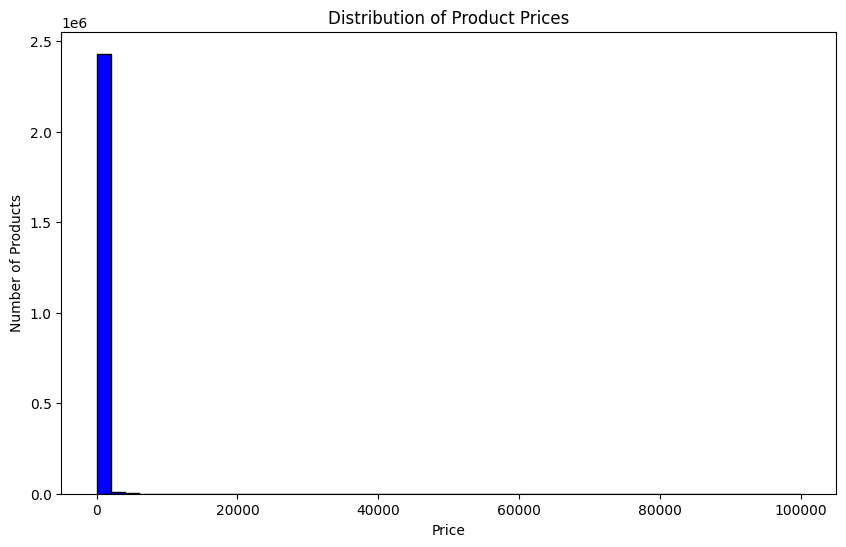

In [17]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(amazon_data['price'], bins=50, color='blue', edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')

# Show the plot
plt.show()

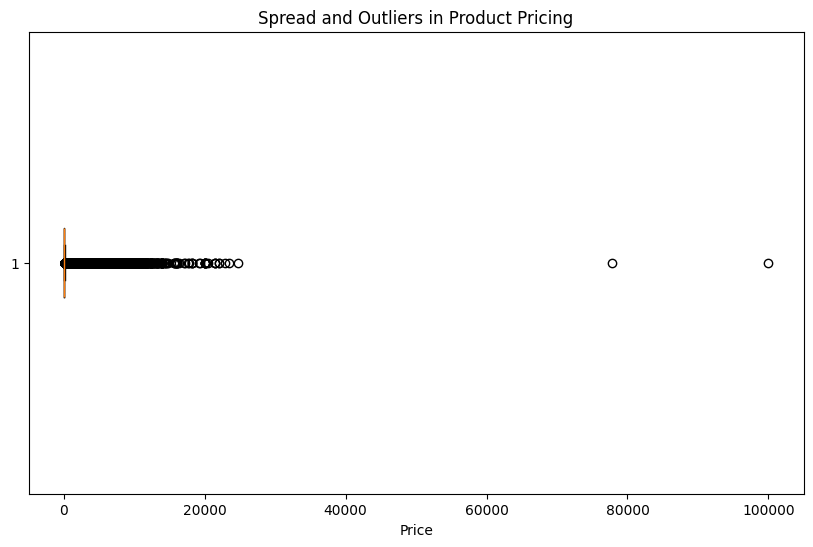

In [18]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.boxplot(amazon_data['price'], vert=False)  # vert=False for a horizontal box plot
plt.title('Spread and Outliers in Product Pricing')
plt.xlabel('Price')

# Show the plot
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?


In [25]:
mean_per_rating = amazon_data['stars'].mean()
median_per_rating = amazon_data['stars'].median()
mode_per_rating = amazon_data['stars'].mode()

print('Mean rating:', mean_per_rating)
print('Median rating:', median_per_rating)
print('Mode rating:', mode_per_rating)

Mean rating: 2.152836472966065
Median rating: 0.0
Mode rating: 0    0.0
Name: stars, dtype: float64


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?


In [26]:
variance_rating = amazon_data['stars'].var()
std_dev_rating = amazon_data['stars'].std()
range_rating = amazon_data['stars'].max() - amazon_data['stars'].min()
interquartile_range_rating = amazon_data['stars'].quantile(0.75) - amazon_data['stars'].quantile(0.25)

print('Variance of rating:', variance_rating)
print('Standard deviation of rating:', std_dev_rating)
print('Range of rating:', range_rating)
print('Interquartile range of rating:', interquartile_range_rating)

Variance of rating: 4.817434029796862
Standard deviation of rating: 2.1948653785134207
Range of rating: 5.0
Interquartile range of rating: 4.4


3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?


In [27]:
skewness_rating = amazon_data['stars'].skew()
kurtosis_rating = amazon_data['stars'].kurt()

print('Skewness of rating:', skewness_rating)
print('Kurtosis of rating:', kurtosis_rating)

Skewness of rating: 0.08120735761080985
Kurtosis of rating: -1.9260061280432985


4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


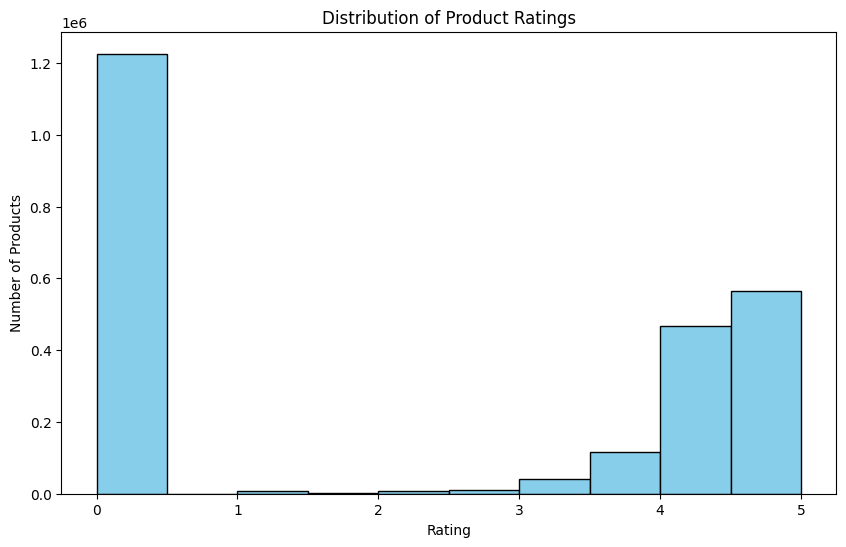

In [32]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(amazon_data['stars'], bins=10, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Products')

# Show the plot
plt.show()